# Import packages
## this notebook uses some functions that we have not encountered yet
* '_sounddevice_' is a package that lets you access your computer's microphone and speaker.
    > Unfortunately this only works when python is running locally on your computer. Google collaboratory notebooks cannot access your computer's local environment to communicate with your microphone, etc. Instead of using this package to perform the experiment, for now we will look at the results of data that I collected by doing a simple psychophysical experiment on myself.
* '_matplotlib.pyplot_' and '_seaborn_' are both packages that contain lots of functions for plotting _arrays_ of numbers (such as a waveform recorded via the microphone)
    > https://seaborn.pydata.org/
* '_scipy_' is a 'scientific' package that contains functions for processing arrays of numbers (like filtering them or detecting peaks in a signal). Here we will use it to get a _spectrogram_ of our waveform.
    > https://en.wikipedia.org/wiki/Spectrogram#:~:text=A%20spectrogram%20is%20a%20visual,sonographs%2C%20voiceprints%2C%20or%20voicegrams.
* '_pathlib_' is a package that is used to work with file/directory paths to pass files into and out of functions (such as saving an array to a waveform file on your computer or loading an array from a file)

In [2]:
import numpy as np
import sounddevice as sd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import signal

from pathlib import Path


savepath = Path('.') / 'data'

In [2]:
sampleRate = 44100
frequency0 = 300
frequency1 = 302
duration = 10

(0.0, 1.0)

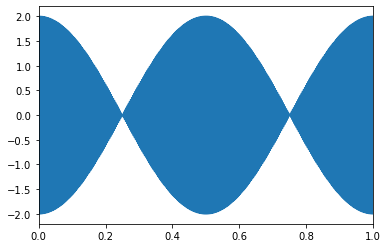

In [3]:
t = np.linspace(0, duration, sampleRate * duration)  #  Produces a 5 second Audio-File
y0 = np.sin(frequency0 * 2 * np.pi * t)  #  Has frequency of 440Hz
y1 = np.sin(frequency1 * 2 * np.pi * t)
plt.plot(t,y0+y1)
plt.xlim(0,1)

In [9]:
response = sd.playrec(data=y0+y1,channels=1,samplerate=sampleRate)

In [10]:
order =5
sampling_freq = sampleRate
cutoff_freq = 2
sampling_duration = duration
number_of_samples = sampling_freq * sampling_duration
time = np.linspace(0, sampling_duration, number_of_samples, endpoint=False)

<ipython-input-11-2104be0ecba7>:11: RuntimeWarning: divide by zero encountered in log
  plt.pcolormesh(t, f, np.log(Sxx), cmap='plasma')


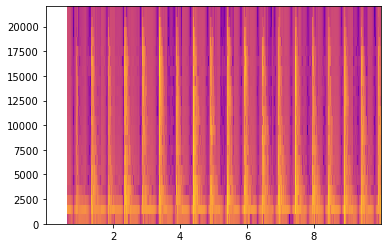

In [11]:
windur = 0.001
winsamp = int(windur*sampleRate)

f, t, Sxx = signal.spectrogram(response.flatten(),
                               fs = sampleRate,
                               window = 'hamming',
                               nperseg = winsamp,
                               noverlap = winsamp/2
                              )

plt.pcolormesh(t, f, np.log(Sxx), cmap='plasma') 
# plt.ylim(0,2500)

In [12]:
%matplotlib qt
hfig = plt.figure()

<Figure size 1280x960 with 0 Axes>

In [159]:
plt.cla()

In [13]:
plt.pcolormesh(t, f, np.log(Sxx), cmap='plasma') 

<ipython-input-13-c271e7dd4525>:1: RuntimeWarning: divide by zero encountered in log
  plt.pcolormesh(t, f, np.log(Sxx), cmap='plasma')


In [14]:
pts = np.asarray(plt.ginput(n=0,timeout=0,show_clicks=True))

In [17]:
response_time = pts[:,0]

In [18]:
plt.cla()

In [19]:
xtime = np.linspace(0, duration, sampleRate * duration) 
plt.plot(xtime,np.abs(signal.hilbert(y0+y1)),color = 'black')

In [20]:
pts = np.asarray(plt.ginput(n=0,timeout=0,show_clicks=True))

In [21]:
beat_time = pts[:,0]

In [22]:
pre_response = []
for b in beat_time:
    n = len(response_time[response_time<b])
    if n == 0:
        pre_response.append(np.NaN)
    if n>0:
        pre_response.append(np.max(response_time[response_time<b])-b)
        
post_response = []
for b in beat_time:
    n = len(response_time[response_time>b])
    if n == 0:
        post_response.append(np.NaN)
    if n>0:
        post_response.append(np.min(response_time[response_time>b])-b)


In [24]:
plt.close(hfig)

In [25]:
%matplotlib inline

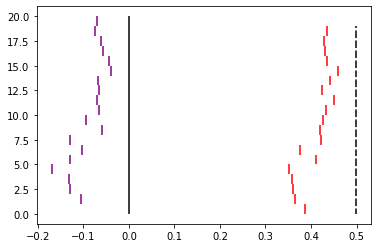

In [26]:
[plt.vlines(0,i,i+1,color = 'black') for i,r in enumerate(beat_time)];
[plt.vlines(np.mean(np.diff(beat_time)),i,i+1,color = 'black',linestyle='--') for i,r in enumerate(beat_time[1:])];
[plt.vlines(r,i,i+1,color = 'purple') for i,r in enumerate(pre_response)];
[plt.vlines(r,i,i+1,color = 'red') for i,r in enumerate(post_response)];

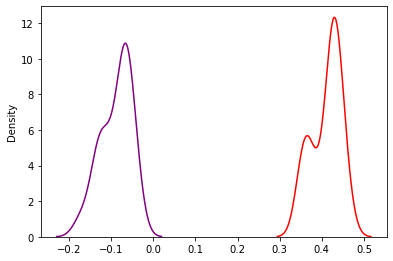

In [30]:
hfig = plt.figure()
ax = hfig.add_axes([0.1,0.1,0.8,0.8])
sns.kdeplot(x = pre_response,ax = ax,color = 'purple')
sns.kdeplot(x = post_response,ax = ax,color = 'red')

In [4]:
sd.query_devices()

> 0 Built-in Microphone, Core Audio (2 in, 0 out)
< 1 Built-in Output, Core Audio (0 in, 2 out)
  2 ZoomAudioDevice, Core Audio (2 in, 2 out)

In [6]:
sampleRate = 20000
duration = 3
xtime = np.linspace(0, duration, sampleRate * duration) 


In [7]:
myrecording = sd.rec(int(duration * sampleRate),samplerate = sampleRate,channels=1)
sd.wait()

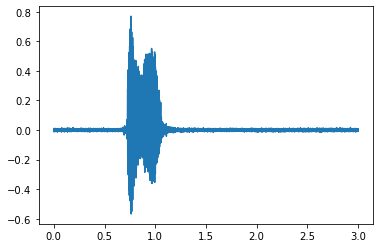

In [8]:
plt.plot(xtime,myrecording)

In [10]:
sd.play(myrecording,sampleRate)

In [18]:
np.save(savepath / 'VocalTurnTaking' / 'Hello',myrecording)

In [3]:
myrecording = np.load(savepath / 'VocalTurnTaking' / 'Hello.npy')

In [7]:
#parameters for spectrogram
windur = 0.01
winsamp = int(windur*sampleRate)

(0.0, 10000.0)

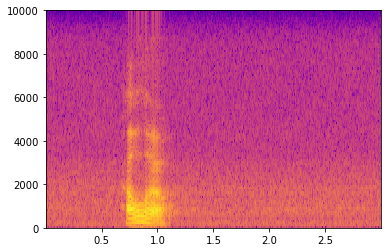

In [8]:
f, t, Sxx = signal.spectrogram(myrecording.flatten(),
                               fs = sampleRate,
                               window = 'hamming',
                               nperseg = winsamp,
                               noverlap = winsamp/2
                              )

plt.pcolormesh(t, f, np.log(Sxx), cmap='plasma') 
plt.ylim(0,10000)

In [23]:
response_mat = []
for i in np.arange(20):
    response = sd.playrec(data=myrecording,channels=1,samplerate=sampleRate)
    sd.wait()
    response_mat.append(response.flatten())

In [25]:
np.save(savepath / 'VocalTurnTaking' / 'ResponseSingle',response_mat)

In [9]:
response_mat = np.load(savepath / 'VocalTurnTaking' / 'ResponseSingle.npy')

In [10]:
f, t, Sxx = signal.spectrogram(myrecording.flatten(),
                               fs = sampleRate,
                               window = 'hamming',
                               nperseg = winsamp,
                               noverlap = winsamp/2
                              )
call_env = np.sum(Sxx,0)

In [11]:
response_env = []
for r in np.asarray(response_mat):
    f, t, Sxx = signal.spectrogram(r.flatten(),
                               fs = sampleRate,
                               window = 'hamming',
                               nperseg = winsamp,
                               noverlap = winsamp/2
                              )
    response_env.append(np.sum(Sxx,0))
response_env = np.asarray(response_env).T
# plt.pcolormesh(t, f, np.log(Sxx), cmap='plasma') 
# plt.ylim(0,15000)

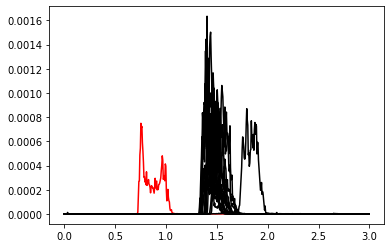

In [12]:
plt.plot(t,call_env,color = 'red')
plt.plot(t,response_env,color = 'black');

    

In [13]:
thresh = 0.0001
response_time = []
for r in response_env.T:
    response_time.append(np.min(t[r>thresh]))
response_time = np.asarray(response_time).T

call_time = np.min(t[call_env>thresh])

In [14]:
response_latency = np.asarray([r - call_time for r in response_time])

mean response latency = 0.6725sec


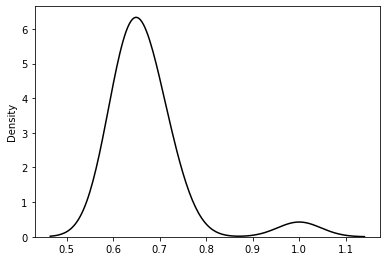

In [15]:
hfig = plt.figure()
ax = hfig.add_axes([0.1,0.1,0.8,0.8])
sns.kdeplot(x = response_latency,ax = ax,color = 'black');

print('mean response latency = ' + str(np.mean(response_latency)) + 'sec')

In [16]:
padlen = int(np.mean(response_latency)*sampleRate)

In [21]:
call = myrecording.flatten()
jamming_call = np.concatenate([np.zeros(padlen),myrecording[0:-padlen].flatten()])

In [23]:
np.shape(call+jamming_call)

(60000,)

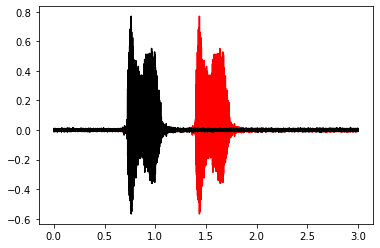

In [24]:
plt.plot(xtime,jamming_call,color = 'red')
plt.plot(xtime,call,color = 'black')

In [25]:
jamming_trial = jamming_call + call
call_trial = call

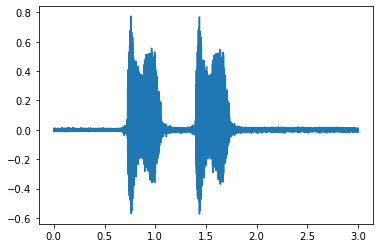

In [26]:
plt.plot(xtime,jamming_trial)

In [27]:
sd.play(jamming_trial,sampleRate)

In [43]:
ntrials = 20
bout = np.repeat(jamming_trial,ntrials).reshape(len(jamming_trial),-1)

catch_trials = np.random.choice(20,size=3)
for i in catch_trials:
    bout[:,i]=call_trial

15
10
16


In [44]:
np.save(savepath / 'VocalTurnTaking' / 'bout0',bout)

In [48]:
response_mat = []
for trial in bout.T:
    response = sd.playrec(data=trial,channels=1,samplerate=sampleRate)
    sd.wait()
    response_mat.append(response.flatten())


In [49]:
np.save(savepath / 'VocalTurnTaking' / 'ResponseDouble',response_mat)

In [51]:
f, t, Sxx = signal.spectrogram(jamming_trial.flatten(),
                               fs = sampleRate,
                               window = 'hamming',
                               nperseg = winsamp,
                               noverlap = winsamp/2
                              )
call_env = np.sum(Sxx,0)

In [50]:
response_env = []
for r in np.asarray(response_mat):
    f, t, Sxx = signal.spectrogram(r.flatten(),
                               fs = sampleRate,
                               window = 'hamming',
                               nperseg = winsamp,
                               noverlap = winsamp/2
                              )
    response_env.append(np.sum(Sxx,0))
response_env = np.asarray(response_env).T
# plt.pcolormesh(t, f, np.log(Sxx), cmap='plasma') 
# plt.ylim(0,15000)

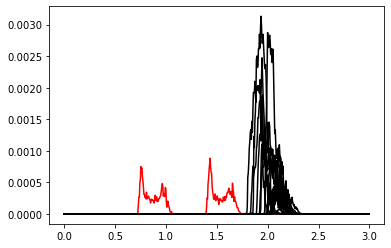

In [52]:
plt.plot(t,call_env,color = 'red')
plt.plot(t,response_env,color = 'black');

    

In [53]:
thresh = 0.0001
response_time = []
for r in response_env.T:
    response_time.append(np.min(t[r>thresh]))
response_time = np.asarray(response_time).T

call_time = np.min(t[call_env>thresh])

In [54]:
response_latency = np.asarray([r - call_time for r in response_time])

mean response latency = 1.249sec


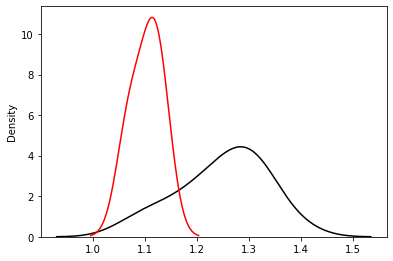

In [57]:
hfig = plt.figure()
ax = hfig.add_axes([0.1,0.1,0.8,0.8])
jam_latency = [t for t not in response_latency]
sns.kdeplot(x = response_latency,ax = ax,color = 'black');
sns.kdeplot(x = response_latency[catch_trials],ax = ax,color = 'red');

print('mean response latency = ' + str(np.mean(response_latency)) + 'sec')

In [58]:
[t for t not in response_latency]

SyntaxError: invalid syntax (<ipython-input-58-0bad424d02e6>, line 1)